# Семинар 2. Знакомство с Python и инструментами анализа данных в Jupyter Notebook.

На семинаре мы познакомимся с основными конструкциями языка python и библиотеками для анализа данных и построим модель для задачи кредитного скоринга.

Цель семинара - дать представление о работе в среде python, а также рассказать основные концепции, чтобы участникам было в последствии осваивать язык. В конце семинара будут даны ссылки на материалы для дальнейшего изучения и небольшое задание для закрепления материала.

В каждой ячейке можно писать команды, создавать переменные, выводить печать.
Ячейка может быть для кода (Code), а может также быть для оформления (Markdown).

На семинаре мы не будем обсуждать оформление, только код.

### Калькулятор

In [190]:
10*(1+2+3+4+5)

150

In [424]:
0.4 * 10 + 0.5 * 8 + 0.1 * 7

8.7

### Переменные и структуры данных

In [425]:
# числа
x = 0.4 * 10 + 0.5 * 8 + 0.1 * 7

In [426]:
print(x)

8.7


In [427]:
x = x * 2

In [428]:
print(x)

17.4


In [429]:
y = 5
z = x ** 5

In [430]:
z

1594946.9462399993

In [431]:
# строки - в одинарных или двойных кавычках
s = "we like machine learning"

In [432]:
print(s)

we like machine learning


Строки тоже можно складывать (обозначает конкатенацию) и умножать на число (обозначает повторение)

In [433]:
s = 'we like' + " machine learning! "

In [434]:
s

'we like machine learning! '

In [435]:
s*2

'we like machine learning! we like machine learning! '

Обычно удобно хранить много объектов - для этого можно использовать список

In [436]:
marks = [10, 8, 5, 9, 10]

In [437]:
marks

[10, 8, 5, 9, 10]

В такие списки можно складывать все, что угодно, включая другие списки:

In [448]:
marks = [["Ivanov", 10], ["Petrov", 8], ["Sidorov", 7]]

Можно добавлять элементы:

In [449]:
marks.append(["Smirnov", 5])

In [450]:
marks.append(8)

In [451]:
marks

[['Ivanov', 10], ['Petrov', 8], ['Sidorov', 7], ['Smirnov', 5], 8]

In [452]:
# пустой список
marks_empty = []

In [453]:
marks_empty

[]

Наконец, можно обращаться к конкретным элементам списка (строки) и выбирать их фрагменты:

In [454]:
marks[2]

['Sidorov', 7]

In [455]:
s[3]

'l'

Достать слово "like":

In [456]:
s[3:7]

'like'

Сделать много восклицательных знаков:

In [457]:
s[:-2] + s[-2]*10

'we like machine learning!!!!!!!!!!'

Еще одна популярная структура данных - словарь. В отличие от списка, элементы в нем не упорядочены, и индексируются ключами. Ключом может быть число, строка и некоторые другие объекты.

In [498]:
marks_dict = {"Ivanov":10, "Smirnov":8, "Bobrov":9}

In [499]:
marks_dict["Smirnov"]

8

__Задание.__ Заменить в строке "_" на фамилию из элемента с номером idx в списке marks.

In [468]:
string = "Mr. _ achieved the best result"
idx = 1

__Решение.__

In [469]:
string[:4]+marks[idx][0]+string[5:]

'Mr. Smirnov achieved the best result'

### Функции

Часто код начинает повторяться. В этом случае лучше его не копировать и подправлять (прямой путь к ошибкам), а оформлять в виде функции.

Например, мы хотим вычислять средний балл студента с весами:

In [458]:
def get_mark(task1, task2, task3):
    return 0.4*task1 + 0.5*task2 + 0.1*task3

In [459]:
get_mark(10, 10, 10)

10.0

In [460]:
get_mark(10, 8, 7)

8.7

In [461]:
marks = []
marks.append(["Ivanov", get_mark(10, 8, 7)])
marks.append(["Smirnov", get_mark(7, 5, 4)])

In [462]:
marks

[['Ivanov', 8.7], ['Smirnov', 5.700000000000001]]

Теперь, если мы захотим подправить формулу усреднения, надо будет только подправить функцию и перезапустить ячейки.

У функции могут быть параметры по умолчанию - они используются, если мы не передаем другие в функцию.

In [485]:
def get_mark(task1, task2, task3, w1=0.4, w2=0.5, w3=0.1):
    return w1*task1 + w2*task2 + w3*task3

In [486]:
get_mark(10, 8, 7)

8.7

In [487]:
get_mark(10, 8, 7, w1=0.3, w3=0.2)

8.4

Есть много стандартных функций. Например, функция str преобразует свой аргумент в строку:

In [402]:
"We have " + 3 + " students"

TypeError: cannot concatenate 'str' and 'int' objects

In [403]:
"We have " + str(3) + " students"

'We have 3 students'

Другая функция считает сумму списка или любого другого объекта - последовательности чисел:

In [406]:
sum([1, 4, 7, 10])

22

### Классы

Функция реализует логику повторения одних и тех же действий над разными объектами. Но иногда мы хотим повторять несколько функций над разными объектами, сохраняя промежуточные результаты. В этом случае удобно использовать класс.

Представим, что вы проверяете работы студентов и хотите записывать оценки во время проверки, чтобы потом посчитать какие-то статистики. Реализуем для этого класс с методом "добавить оценку" и "вывести оценки".

In [477]:
class Journal:
    def __init__(self, w1, w2, w3):
        self.w1 = w1 # атрибуты класса
        self.w2 = w2
        self.w3 = w3
    
    def clear(self):
        self.marks = []
        
    def add_mark(self, name, task1, task2, task3):  # метод класса
        mark = self.w1 * task1 + self.w2 * task2 + self.w3 * task3
        self.marks.append([name, mark])
        
    def print_marks(self):
        print("Marks for test: "+str(self.marks))

In [478]:
journal = Journal(0.3, 0.2, 0.5) # создаем объект класса

In [479]:
journal.clear() # методы класса
journal.add_mark("Nadia", 10, 10, 9)
journal.add_mark("Kate", 10, 8, 10)
journal.add_mark("Anna", 8, 7, 8)

In [480]:
journal.print_marks()

Marks for test: [['Nadia', 9.5], ['Kate', 9.6], ['Anna', 7.8]]


Благодаря оформлению в виде класса мы не работает с переменными marks, w1, w2, w3, а только пользуемся готовыми методами класса. Если класс писали не мы, мы даже не будем знать, какие вспомогательные переменные в нем хранятся. 


In [476]:
journal.w1 # атрибут класса

0.3

Обратите внимание, что методы могут добавлять новые атрибуты (переменные) в объект класса:

In [481]:
journal2 = Journal(0.1, 0.4, 0.5)
journal2.marks

AttributeError: Journal instance has no attribute 'marks'

In [482]:
journal2.clear()
journal2.marks

[]

Атрибут класса - переменные, хранящиеся в объекте класса (хранят какие-то значения).

Методы класса - функции, вычисляющие какие-то значения по своим входным аргументам, используя атрибуты класса и, возможно, другие (глобальные) переменные.

### Импорт библиотек

Код можно писать не только в консоли (мы сейчас пишем в интерактивной консоли), но и сохранять в файлы. Обычно функции и классы оформляют в файлах, а затем импортируют их из консоли, чтобы использовать эти функции и классы при работе с конкретными данными. 

В больших библиотеках таких файлов много, но их оформляют так, чтобы можно было импортировать все одной командой.

Импорт библиотеки pandas для удобной работы с табличными данными:

In [48]:
import pandas as pd

Здесь мы пишем as pd, переименовывая библиотеку в своем коде, чтобы не писать все время полное название.

Теперь можно будет обращатсья к функциям и классам с помощью конструкции с точкой:

In [463]:
pd.DataFrame # это один из классов библиотеки

pandas.core.frame.DataFrame

Можно импортировать только отдельный класс или функцию, не импортируя всю библиотеку. Для этого используют конструкцию from:

In [464]:
from pandas import DataFrame

In [465]:
DataFrame # после такого импорта можно обращаться без названия библиотеки и .

pandas.core.frame.DataFrame

### Загрузка данных и быстрый просмотр

Мы будем работать с [данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) (задача кредитного скоринга). Для целей семинара данные были преобразованы в немного другой формат.

Значение признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

По описанию данных понятно, что все признаки числовые (включая вещественные, порядковые, бинарные), кроме предпоследнего, который является категориальным.

In [797]:
tab = pd.read_excel("https://github.com/nadiinchi/voronovo_seminar_materials/blob/master/base_track/seminars/scoring.xls?raw=true")

In [798]:
type(tab)

pandas.core.frame.DataFrame

tab - это объект класса DataFrame, куда его записала функция read_excel модуля pandas. Его часто называют даатфреймом. Далее мы познакомимся с разными методами и атрибутами класса.

In [799]:
tab.head() # вывести первые строки

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


По строкам - объекты (клиенты), по столбцам - признаки, последний столбец - целевая переменная (1 - кредит выдан, 0 - в кредите отказано).

#### Важные атрибуты датафрейма

In [800]:
tab.columns # названия колонок

Index([u'account', u'duration', u'credit_history', u'amount', u'savings',
       u'employment', u'guarantors', u'residence', u'age', u'credits_number',
       u'job', u'maintenance_people', u'telephone', u'foreign', u'real_estate',
       u'life_insurance', u'car', u'housing_rent', u'sex', u'purpose',
       u'target'],
      dtype='object')

In [801]:
tab.index # названия строк

RangeIndex(start=0, stop=600, step=1)

In [802]:
tab.dtypes # типы столбцов

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

Еще раз убеждаемся в наличии в основнмо числовых признаков.

#### Индексация датафрейма

К датафрейму так же, как и ко списку, можно применять индексацию (по колонкам):

In [803]:
tab["credits_number"].head()

0    1
1    1
2    1
3    3
4    1
Name: credits_number, dtype: int64

In [804]:
# выбрать несколько колонок
tab[["credits_number", "target"]].head()

,credits_number,target
0,1,1
1,1,1
2,1,0
3,3,1
4,1,0


#### Некоторые методы датафрейма

Метод value_counts считает, сколько разных элементов в столбце:

In [805]:
tab["credits_number"].value_counts()

1    403
2    177
3     17
4      3
Name: credits_number, dtype: int64

In [806]:
tab["target"].value_counts()

1    300
0    300
Name: target, dtype: int64

Метод sort_values сортирует строки:

In [590]:
tab.sort_values("age")[["age", "target"]]

,age,target
535,0.19,0
28,0.19,1
382,0.20,0
133,0.20,1
226,0.20,0
413,0.20,0
79,0.20,1
207,0.20,1
591,0.20,0
232,0.20,0


С помощью методов pandas вместо с методами из еще одной библиотеки numpy можно реализовать любые преобразования данных и алгоритмы для их анализа.

### Построение модели

В этой секции мы воспольуемся несколькими функциями и классами библиотекиsklearn, чтобы построить первые предсказывающие модели на наших данных и оценить качество.

Создаем матрицу объекты-признаки и матрицу ответов. Удалим пока столбец с категориальной переменной, чтобы оставить только числовые признаки.

In [612]:
X = tab[tab.columns[:-2]]
y = tab["target"]

In [613]:
X.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1


In [614]:
X.shape, y.shape # атрибут shape показывает размерности матрицы

((600, 19), (600,))

#### Разделение выборки

In [615]:
from sklearn.model_selection import train_test_split
# функция для разделения выборки на обучающую и тестовую

In [616]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [617]:
y_train.value_counts()

1    222
0    198
Name: target, dtype: int64

In [618]:
y_test.value_counts()

0    102
1     78
Name: target, dtype: int64

In [619]:
X_train.shape, y_train.shape

((420, 19), (420,))

#### Импортируем классы моделей

In [599]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [620]:
clf_knn = KNeighborsClassifier() 
# создаем объект класса c параметрами по умолчанию
clf_knn.fit(X_train, y_train) # вызываем метод для обучения классификатора

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [621]:
y_pred = clf_knn.predict(X_test) # вызываем метод для предсказания

In [622]:
from sklearn.metrics import accuracy_score # функция оценки качества

In [623]:
accuracy_score(y_test, y_pred)

0.6166666666666667

In [624]:
y_pred[:20]

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [625]:
y_test[:20].values

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [626]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [627]:
y_pred = clf_lr.predict(X_test)

In [628]:
accuracy_score(y_test, y_pred)

0.63888888888888884

In [629]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [630]:
y_pred = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.66666666666666663

Лучшее качество показал случайный лес. Очевидное преимущество sklearn в том, что нам необязательно знать, как работает метод, чтобы им пользоваться :) Однако это порождает трудности уже на этапе подбора гиперпараметров, для которого желательно знать, что они означают. В нашей версии мы используем все гиперпараметры по умолчанию - указаны в скобках в ячейках выше.

#### Важности и веса признаков
Большинство алгоритмов умеют так или иначе оценивать важности признаков - для работы с ними, кстати, тоже желательно понимать, как работает алгоритм :)

Например, в линейной модели в качестве важностей можно рассматривать веса признаков. Они хранятся в атрибуте coef_ и появляются, конечно, только после вызова процедуры обучения.

In [631]:
clf_lr.coef_

array([[ 0.1774879 , -1.54757934,  0.380984  , -0.79475429,  0.16713926,
         0.25793727, -0.14184915, -0.00160698,  0.40076867, -0.3897667 ,
        -0.01079999, -0.07218369,  0.14892876, -0.84855602,  0.65289379,
        -0.16231746,  0.52707661, -0.47609305,  0.45585354]])

__Задание.__ Оформить веса признаков в виде датафрейма: первый столбец - имя признака, второй столбец - вес, и отсортировать датафрейм по увеличению веса.

__Решение:__

In [637]:
pd.DataFrame({"feature":tab.columns[:-2],
             "weight":clf_lr.coef_[0]}).sort_values("weight")

,feature,weight
1,duration,-1.547579
13,foreign,-0.848556
3,amount,-0.794754
17,housing_rent,-0.476093
9,credits_number,-0.389767
15,life_insurance,-0.162317
6,guarantors,-0.141849
11,maintenance_people,-0.072184
10,job,-0.010800
7,residence,-0.001607


Признаки duration, amount и age имеют большие по модулю веса, но это во многом из-за того, что сами эти признаки по модулю меньше остальных. 

Если не брать их в расчет, то наибольший вклад в ответ вносят признаки является ли заемщик иностранцем, наличие собственности, машины.

Признаки отсортировались по логичным критериям: плата за съем жилья, число кредитов, заемщик-иностранец уменьшают шанс получить кредит; наличие собственности, машины, работы, счета в банке - увеличивают шансы.

Впрочем, некоторые признаки отсортировались менее логично: например, наличие поручителя тоже голосует в "минус".

#### Работа с категориальным признаком

Применим метода one-hot-encoding к переменной "цель получения кредита", чобы включить ее в модель. Для этого воспользуемся функцией pd.get-dummies

In [639]:
tab_ohe = pd.get_dummies(tab, "purpose")

In [640]:
tab_ohe.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,0,0,0,0,0,0,0,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,0,0,0,0,0,0,0,0,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,0,0,0,0,0,0,0,0,1,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,0,0,0,0,0,0,0,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,0,0,0,0,1,0,0,0,0,0


In [648]:
# удаляем целевую переменную с помощью метода drop
X_ohe = tab_ohe.drop("target", axis=1)
# axis=1 показывает, что мы отим удалить столбец, а не строку (axis=0)

In [649]:
X_train_ohe, X_test_ohe, y_train, y_test  = train_test_split(X_ohe, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

Благодаря фиксации random_state=0 мы получаем одно и то же разделение.

Оформим обучение классификатора и подсчет качества в виде функции:

In [651]:
def get_accuracy(clf):
    clf.fit(X_train_ohe, y_train)
    y_pred = clf.predict(X_test_ohe)
    return accuracy_score(y_test, y_pred)

In [653]:
print(get_accuracy(KNeighborsClassifier()))
print(get_accuracy(LogisticRegression()))
print(get_accuracy(RandomForestClassifier()))

0.605555555556
0.65
0.683333333333


Качество с новым признаком улучшилось для последних двух классификаторов.

А что, если мы просто пронумеруем категории? Для этого воспользуемся классом LabelEncoder:

In [680]:
from sklearn.preprocessing import LabelEncoder

In [681]:
le = LabelEncoder()
tab["purpose"] = le.fit_transform(tab["purpose"])

In [683]:
X_le = tab[tab.columns[:-1]]

In [685]:
X_train_le, X_test_le, y_train, y_test  = train_test_split(X_le, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [686]:
def get_accuracy(clf):
    clf.fit(X_train_le, y_train)
    y_pred = clf.predict(X_test_le)
    return accuracy_score(y_test, y_pred)

In [687]:
print(get_accuracy(KNeighborsClassifier()))
print(get_accuracy(LogisticRegression()))
print(get_accuracy(RandomForestClassifier()))

0.588888888889
0.627777777778
0.622222222222


Качество всех классификаторов ухудшилось.

####  Улучшение качества модели: подбор параметров

Чтобы улучшить качество, можно попробовать другие значения параметров:

In [663]:
print(get_accuracy(LogisticRegression(C=10)))

0.666666666667


Обычно гиперпараметры подбирают по отдельной выборке, называемой валидационной, или с помощью более сложных методов, например, кросс-валидацией. 

Для этого можно строить график зависимости качества на валидационной или тестовой выборке от значения параметра. Сделаем это для метрического метода, параметр - число соседей.

In [676]:
accuracies = []
accuracies.append(get_accuracy(LogisticRegression(C=0.001)))
accuracies.append(get_accuracy(LogisticRegression(C=0.01)))
accuracies.append(get_accuracy(LogisticRegression(C=0.1)))
accuracies.append(get_accuracy(LogisticRegression(C=1)))
accuracies.append(get_accuracy(LogisticRegression(C=10)))
accuracies.append(get_accuracy(LogisticRegression(C=100)))
accuracies.append(get_accuracy(LogisticRegression(C=1000)))

In [677]:
from matplotlib import pyplot as plt # импортируем модуль для рисования
%matplotlib inline

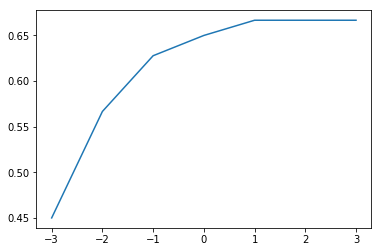

In [679]:
plt.plot([-3, -2, -1, 0, 1, 2, 3], accuracies) # функция отрисовки графика

Получаем, что оптимальное значение параметра С равно 10 или больше.

### Заключение

На семинаре мы познакомились со следующими конструкциями:
* основные типы языка python: числа, строки, списки
* функции и классы - главный путь оформления готовых алгоритмов в python
* pandas - модуль для удобной работы с табличными данными
* sklearn - большая библиотека с алгоритмами машинного обучения

Мы в упрощенном виде прошли путь от данных, хранящихся в отдельном файле, до настроенной модели, с использованием готовых методов библиотеки sklearn.

Чтобы использовать эти инструменты более уверенно, стоит пройти несколько онлайн курсов или прочитать несколько туториалов по темам:
* python
* numpy - библиотека для матричных вычислений с числовыми данными
* pandas - библиотека для работы с табличными разнотипными данными
* sklearn - библиотека для анализа данных
* matplotlib, seaborn - библиотека для визуализации

Мы рекомендуем следующие материалы по python:
* [https://www.learnpython.org/](https://www.learnpython.org/) - интерактивный туториал (можно прямо в туториале писать код) по языку + введение в numpy и pandas
* [https://snakify.org/](https://snakify.org/) -  еще один интерактивный онлайн-туториал по языку python3
* [Курс на DataCamp](https://www.datacamp.com/courses/intro-to-python-for-data-science/?utm_source=learnpython_com&utm_campaign=learnpython_tutorials) - подробно и снова интерактивно (+ numpy)
* [Dive into python](http://ru.diveintopython.net/) -  подробный онлайн-учебник, переведенный на русский язык

Материалы по numpy:
* см. в секции про python
* [Англоязычный подробный туториал по numpy](http://nbviewer.jupyter.org/github/Atlas7/scipy-tentative-numpy-tutorials/blob/master/tentative-numpy-tutorial.ipynb)
* [Ноутбук с семинаров ФКН](https://github.com/esokolov/ml-course-hse/blob/master/2017-fall/seminars/sem01-tools.ipynb) - тут же про оформление ячеек в среде jupyter, необходимый и в целом для начала достаточный минимум по numpy и pandas


Материалы по pandas:
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) - официальное быстрое введение в библиотеку 
* [Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) - официальный подробный понятный туториал
* [Курс на DataCamp](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas)

Материалы по sklearn:
* [Официальные туториалы sklearn](http://scikit-learn.org/stable/tutorial/index.html) - тут же много полезного про сами алгоритмы
* [Вводный интерактивный туториал](https://www.datacamp.com/community/tutorials/machine-learning-python)


### Задание

##### Нам понадобится метод map

Перекодирует значения в столбце согласно словарю: ключи словаря переводятся в соответствующие значения. Пример:

In [790]:
tab["sex"].head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    1
8    1
9    1
Name: sex, dtype: int64

In [791]:
tab["sex"].map({1:"male", 0:"female"}).head(10)

0      male
1      male
2      male
3      male
4      male
5    female
6    female
7      male
8      male
9      male
Name: sex, dtype: object

__Цель__: построить классификатор смс-сообщений на спам и не спам

In [807]:
sms = pd.read_csv("https://raw.githubusercontent.com/nadiinchi/voronovo_seminar_materials/master/base_track/seminars/sms.csv")



1. Выведите первые 5 строк датафрейма
1. Создайте переменную y, которая будет хранить правильные ответы. Для этого выберите столбец "v1" и перекодируйте "ham" на 0 и "spam" на 1 с помощью метода map
1. Выведите, скольок 0 и 1 в y.
1. Импортируйте класс CountVectorizer из sklearn.feature_extraction.text и прочитайте страницу его [документации](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Этот класс позволяет преобразовать последователньость (список или столбец) строк-текстов в матрицу (число текстов)x(число слов), каждый элемент - есть ли такое слово в тексте. 
1. Создайте объект класса CountVectorizer, затем трансформируйте с его помощью столбец sms["v2"]. Интерфейс такой же, как у LabelEncoder. На выходе получится матрица объекты-признаки. Если вы хотите посмотреть, из чего она состоит, напишите print <матрица>.
1. Разбейте матрицу объекты-признаки и вектор y на обучение и контроль по аналогии с семинаром.
1. Обучите логистическую регрессию и сделайте предсказания для контрольной выборки.
1. Импортируйте функции precision_score, recall_score, f1_score из sklearn.metrics - это метрики точности, полноты и F-меры - агрегирующей величины точности и полноты.
1. Вычислите accuracy, precision, recall и f1 для логистической регрессии. Почему в данной задаче неудобно использовать accuracy?
1. Обучите KNN на этих данных и выведите качество. Какой метод лучше?
1. Выведите веса логистичсекой регрессии в виде отсортированного датафрейма, как мы это делали на семинаре. Чтобы получить слова в том порядке, в котором они идут в матрице объекты-признаки, воспользуйтесь методом get_feature_names() вашего объекта CountVectorizer. Признаков очень много, поэтому посередине вы увидите "...". Но нас как раз интересуют слова, имеющие наибольший вес в обоих классах - их вы увидите в топе и в конце списка. Можно ли сказать, что слова с большими положительными весами действительно характеризуют спам, в отличие от слов с большими положительными весами?